In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from scipy.stats import boxcox
sns.set(style='white')

## Import data and EDA

In [2]:
df=pd.read_csv('50_Startups.csv')

In [3]:
df=df.drop(df[df['R&D Spend']==0].index)

In [4]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 48
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        48 non-null     float64
 1   Administration   48 non-null     float64
 2   Marketing Spend  48 non-null     float64
 3   State            48 non-null     object 
 4   Profit           48 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.2+ KB


In [6]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,48.000000,48.000000,48.000000,48.000000
mean,76793.349583,121142.109583,218876.704792,115487.308958
std,44224.086236,28526.050007,118303.028079,37110.594903
min,542.050000,51283.140000,0.000000,35673.410000
25%,45528.002500,102579.505000,136984.482500,95036.680000
50%,74661.715000,122699.795000,221897.880000,108643.015000
75%,105065.712500,145190.700000,300632.782500,142253.990000
max,165349.200000,182645.560000,471784.100000,192261.830000


### Multicollinearity Check:

<AxesSubplot:>

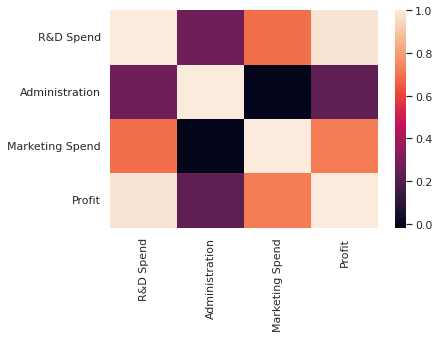

In [7]:
sns.heatmap(df.corr())

#### From above we can conclude that there no perfect non-multicollinearity present in Data as we have some categorical features which deviates away from regression assumptions

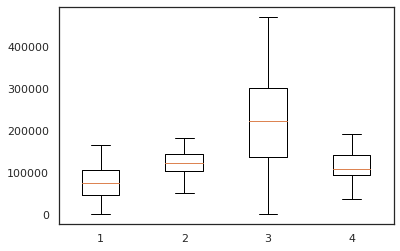

In [8]:
plt.boxplot(df.drop('State',axis=1))
plt.show()
#sns.boxplot(df.drop('State',axis=1))

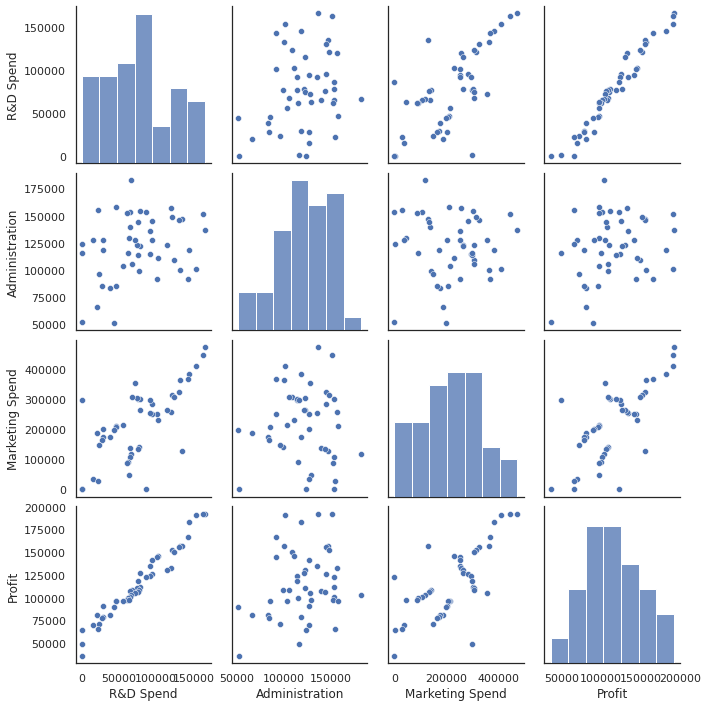

In [9]:
sns.pairplot(df)

### Linearity Check:

<AxesSubplot:xlabel='Marketing Spend', ylabel='Profit'>

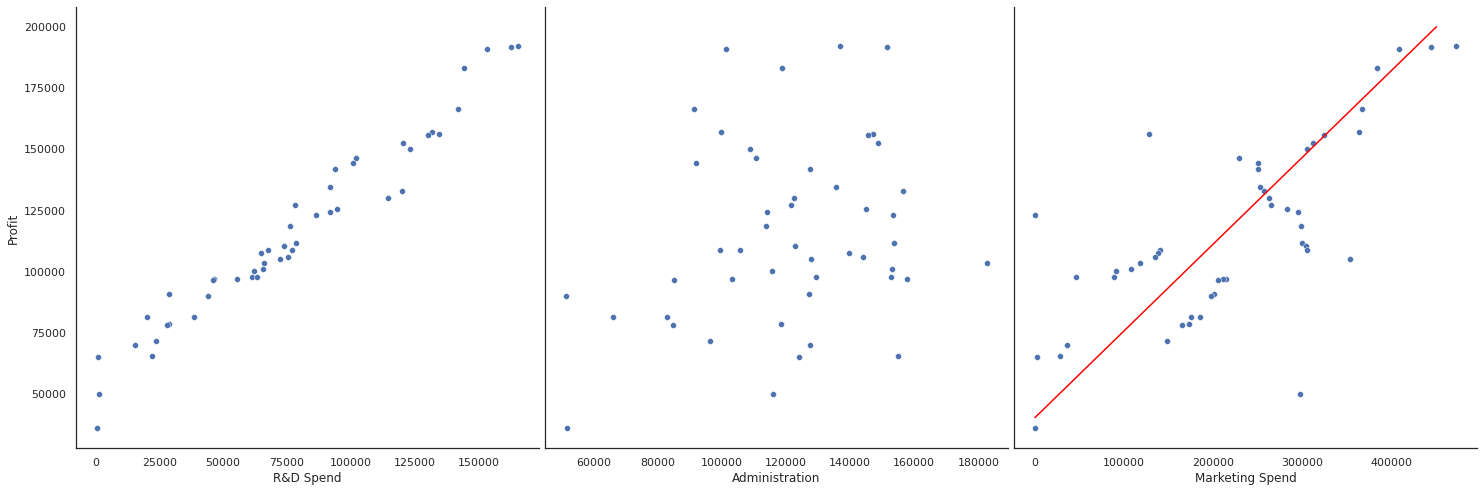

In [10]:
_=sns.pairplot(data=df,x_vars=['R&D Spend','Administration','Marketing Spend'],y_vars='Profit',height=7)
sns.lineplot(x=[0,450000],y=[40000,200000],color='red')

#### QQ plots to see Linearity

<AxesSubplot:xlabel='R&D Spend', ylabel='Profit'>

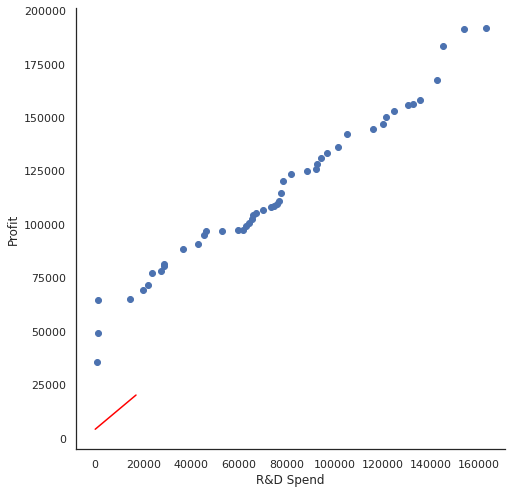

In [11]:
from seaborn_qqplot import pplot
pplot(df,x='R&D Spend',y='Profit',kind='qq',height=7)
sns.lineplot(x=[0,17000],y=[4000,20000],color='red')

#### From above we can see that data is not Homoscadascous.

### Checking the normality of data using Shapiro and making data normal using Boxcox transformation

In [12]:
from scipy.stats import shapiro
shapiro(df.Profit)

ShapiroResult(statistic=0.9777237772941589, pvalue=0.487731009721756)

In [13]:
prf_df,_=boxcox(df.Profit)
shapiro(prf_df)

ShapiroResult(statistic=0.9846063256263733, pvalue=0.7750201225280762)

In [14]:
df.Profit=prf_df

In [15]:
shapiro(df['Administration'])

ShapiroResult(statistic=0.9699163436889648, pvalue=0.2514325976371765)

In [16]:
adm_df,_=boxcox(df.Administration)
shapiro(adm_df)

ShapiroResult(statistic=0.980928897857666, pvalue=0.6178129315376282)

In [17]:
df.Administration=adm_df

In [18]:
shapiro(df['Marketing Spend'])

ShapiroResult(statistic=0.9805382490158081, pvalue=0.6012575626373291)

In [19]:
shapiro(df['R&D Spend'])

ShapiroResult(statistic=0.9727425575256348, pvalue=0.3227234482765198)

In [20]:
rd_df,_=boxcox(df['R&D Spend'])
shapiro(rd_df)

ShapiroResult(statistic=0.9733019471168518, pvalue=0.33871030807495117)

In [21]:
df['R&D Spend']=rd_df

In [22]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,6727.280793,8.665412e+07,471784.10,New York,4736.738938
1,6648.216520,1.016174e+08,443898.53,California,4729.075200
2,6382.208154,5.364541e+07,407934.54,Florida,4716.962796
3,6114.061157,6.910109e+07,383199.62,New York,4582.822418
4,6046.320734,4.568358e+07,366168.42,Florida,4301.154724
5,5736.276832,5.253143e+07,362861.36,New York,4142.089232
6,5819.947821,9.720924e+07,127716.82,California,4126.905250
7,5687.807554,9.546901e+07,323876.68,Florida,4120.430260
8,5384.336678,9.880444e+07,311613.29,New York,4058.184983
9,5471.917704,6.011214e+07,304981.62,California,4014.796625


### After transforming non normal data to normal distribution using Boxcox

In [23]:
df=pd.get_dummies(df,columns=['State'])

In [24]:
df

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,6727.280793,8.665412e+07,471784.10,4736.738938,0,0,1
1,6648.216520,1.016174e+08,443898.53,4729.075200,1,0,0
2,6382.208154,5.364541e+07,407934.54,4716.962796,0,1,0
3,6114.061157,6.910109e+07,383199.62,4582.822418,0,0,1
4,6046.320734,4.568358e+07,366168.42,4301.154724,0,1,0
5,5736.276832,5.253143e+07,362861.36,4142.089232,0,0,1
6,5819.947821,9.720924e+07,127716.82,4126.905250,1,0,0
7,5687.807554,9.546901e+07,323876.68,4120.430260,0,1,0
8,5384.336678,9.880444e+07,311613.29,4058.184983,0,0,1
9,5471.917704,6.011214e+07,304981.62,4014.796625,1,0,0


### Data normality check

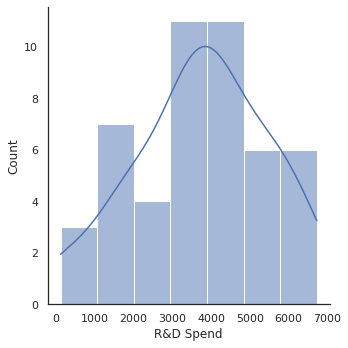

In [25]:
sns.displot(df['R&D Spend'],kde=True)

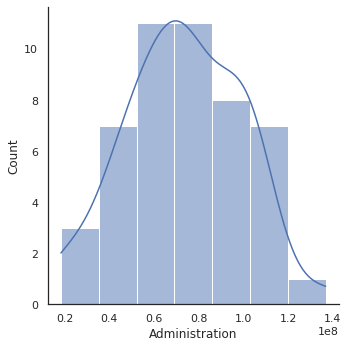

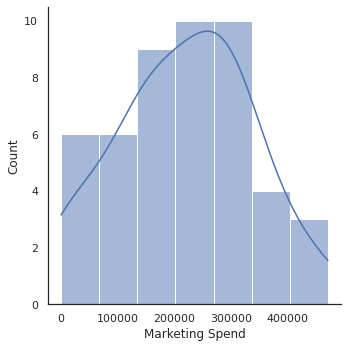

In [26]:
sns.displot(df.Administration,kde=True)
sns.displot(df['Marketing Spend'],kde=True)

#### Data looks quite Normal

### Scaling the Data

In [27]:
mmc=MinMaxScaler()
sc=StandardScaler()
mmc_df=mmc.fit_transform(df)

In [28]:
mmc_df=pd.DataFrame(mmc_df,columns=[df.columns])

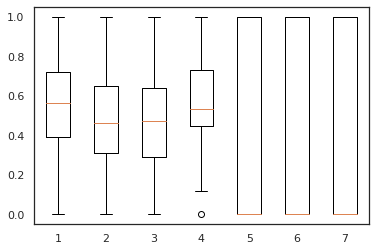

In [29]:
plt.boxplot(mmc_df)
plt.show()

### Dataframe split and fitting

In [30]:
X_train, X_test, y_train, y_test= tts(df.drop('Profit',axis=1),df.Profit,random_state=42)

In [31]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [32]:
model.score(X_test,y_test)

0.9419129852558271

In [33]:
r2_score(y_test,model.predict(X_test))

0.9419129852558271

In [34]:
X_train, X_test, y_train, y_test= tts(mmc_df.drop('Profit',axis=1),mmc_df.Profit,random_state=42)

/home/vikrant/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [35]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [36]:
model.score(X_test,y_test)

0.941912985255829

In [37]:
model.coef_[0]

array([ 0.78349244, -0.02248834,  0.11617225,  0.00961103, -0.0053015 ,
       -0.00430953])

### Dominant features = R&D Spend

<BarContainer object of 6 artists>

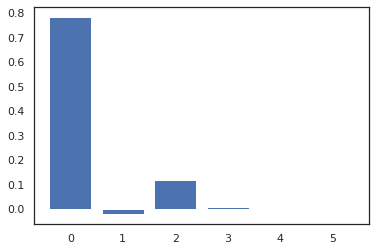

In [38]:
plt.bar(range(len(model.coef_[0])),model.coef_[0])

### Residuals plot

<AxesSubplot:>

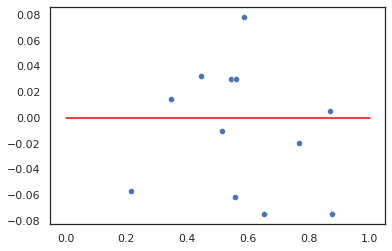

In [39]:
preds=model.predict(X_test)
residuals=preds-y_test
sns.scatterplot(y=np.array(residuals.Profit).reshape(12,),x=np.array(preds).flatten())
sns.lineplot(x=[0,1],y=[0,0],color='red')

### Residual's normality

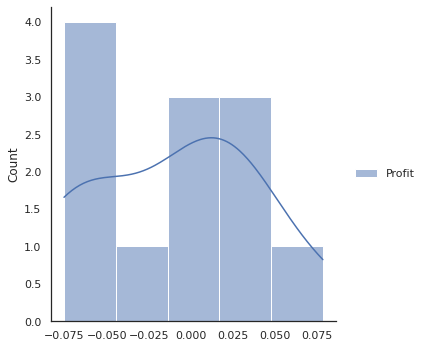

In [40]:
sns.displot(residuals,kde=True)

<AxesSubplot:>

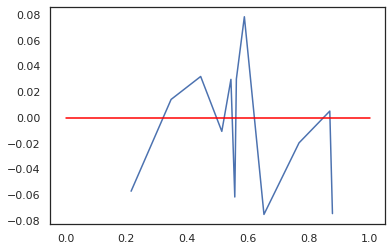

In [41]:
sns.lineplot(y=np.array(residuals.Profit).reshape(12,),x=np.array(preds).flatten())
sns.lineplot(x=[0,1],y=[0,0],color='red')

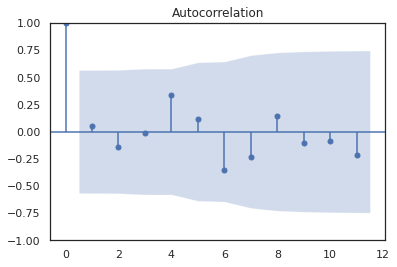

In [42]:
import statsmodels.api as sm

_=sm.graphics.tsa.plot_acf(residuals, lags=11)

#### No autocorrelation in predictions hence no seasonality